In [88]:
import tensorflow as tf ###models
import numpy as np ###math computations
import matplotlib.pyplot as plt ###plotting bar chart
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization,Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from google.colab import drive

**DATA PREPARATION**

In [52]:
dataset,dataset_info = tfds.load('malaria',with_info=True, as_supervised=True,shuffle_files=True,split=['train'])

In [53]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [54]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):

  DATASET_SIZE=len(dataset)

  #taking 60% values for training
  train_dataset=dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  #print(list(train_dataset.as_numpy_iterator()))

  #taking 20% validation values
  val_test_dataset=dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset=val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
  #print(list(val_test_dataset.as_numpy_iterator()))

  #taking 20% testing values
  test_dataset=val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))

  return train_dataset,val_dataset,test_dataset


In [55]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1

#dataset=tf.data.Dataset.range(10)

train_dataset,val_dataset,test_dataset= splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [56]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [57]:
for data in dataset[0].take(4):
  print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

In [58]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear i

**DATA VISUALIZATION**

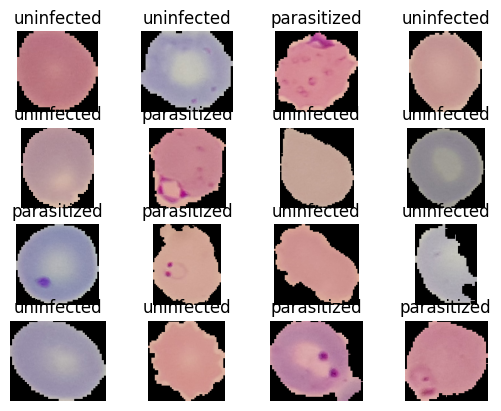

In [59]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

**DATA PREPROCESSING**

In [60]:
IM_SIZE = 224
def resize_rescale(image,label):
  return tf.image.resize(image, (IM_SIZE,IM_SIZE))/255.0,label

In [61]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [62]:
for image,label in train_dataset.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [63]:
BATCH_SIZE=32
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [64]:
val_dataset=val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [65]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [66]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**MODEL CREATION**

In [67]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),
    Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu'),
    BatchNormalization(),

    MaxPool2D(pool_size=2,strides=2),
    Flatten(),

    Dense(100,activation="relu"),
    BatchNormalization(),

    Dense(10,activation="relu"),
    BatchNormalization(),

    Dense(1,activation="sigmoid"),
])
lenet_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_20 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_21 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

**ERROR SANCTIONING**

In [68]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy(from_logits=True) #we are not sure abt y_pred vals thats why true
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0227046>

In [69]:

lenet_model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')
              #metrics=RootMeanSquaredError())

In [70]:
history = lenet_model.fit(train_dataset,epochs=20,verbose=1)

Epoch 1/20
689/689 [==============================] - 52s 55ms/step - loss: 0.6392 - accuracy: 0.6402
Epoch 2/20
689/689 [==============================] - 37s 54ms/step - loss: 0.3726 - accuracy: 0.8432
Epoch 3/20
689/689 [==============================] - 37s 54ms/step - loss: 0.5077 - accuracy: 0.7636
Epoch 4/20
689/689 [==============================] - 39s 56ms/step - loss: 0.3254 - accuracy: 0.8738
Epoch 5/20
689/689 [==============================] - 38s 55ms/step - loss: 0.2260 - accuracy: 0.9261
Epoch 6/20
689/689 [==============================] - 38s 55ms/step - loss: 0.2182 - accuracy: 0.9305
Epoch 7/20
689/689 [==============================] - 39s 57ms/step - loss: 0.2183 - accuracy: 0.9311
Epoch 8/20
689/689 [==============================] - 38s 55ms/step - loss: 0.1916 - accuracy: 0.9429
Epoch 9/20
689/689 [==============================] - 38s 54ms/step - loss: 0.1830 - accuracy: 0.9440
Epoch 10/20
689/689 [==============================] - 39s 57ms/step - loss: 0.170

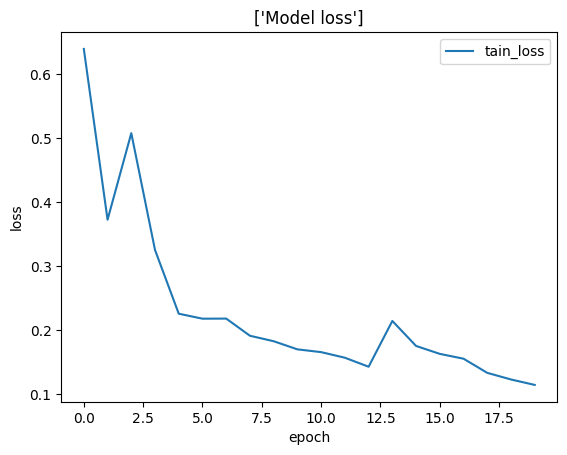

In [72]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title(['Model loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['tain_loss','val_loss'])
plt.show()

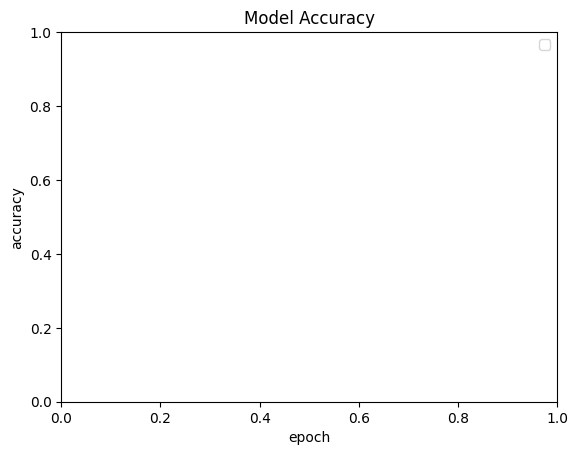

In [73]:
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['tain_accuracy','val_accuracy'])
plt.show()

**MODEL EVALUATION AND TESTING**

In [74]:
test_dataset=test_dataset.batch(1)

In [75]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [76]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [77]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 28s 5ms/step - loss: 0.3506 - accuracy: 0.8926


[0.3506442606449127, 0.8926368951797485]

**MODEL PREDICTION**

In [78]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

In [79]:
parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 16s 16s/step


'P'

1/1 [==============================] - 0s 42ms/step


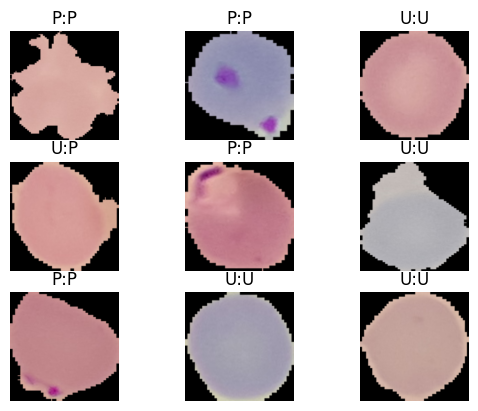

In [80]:
for i, (image,label) in enumerate(test_dataset.take(9)):

  ax=plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0]))+":"+str(parasite_or_not(lenet_model.predict(image)[0][0])))

  plt.axis('off')

**FUNCTIONAL API**

In [86]:
func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name="Input Image")
 #stacking up different layers
x=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(func_input)
   #passing x into this batchnorm layer
x=BatchNormalization()(x)



#these conv layers are responsible for extracting useful features from the images

  #passing x into this maxpool 2D layer
x=MaxPool2D(pool_size=2,strides=2)(x)
x = Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu')(x)
x =  BatchNormalization()(x)

x = MaxPool2D(pool_size=2,strides=2)(x)

output = Dense(1,activation="sigmoid")(x)

    #creating lenet model here
feature_extractor_model = Model(func_input,output, name="Feature_Extractor")

feature_extractor_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_30 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_31 (Bat  (None, 109, 109, 16

**CALLABLE MODEL**

In [87]:
func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name="Input Image")
x=feature_extractor_model(func_input)
x = Flatten()(x)

#these dense layers are responsible for correctly classifying whether the images are paracetic or not

x = Dense(100,activation="relu")(x)
x = BatchNormalization()(x)

x =  Dense(10,activation="relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1,activation="sigmoid")(x)

   #creating  model here
  #creating lenet model here
lenet_model_func = Model(func_input,func_output, name="Lenet_Model")

lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 54, 54, 1)        1153      
 al)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 2916)              0         
                                                                 
 dense_23 (Dense)            (None, 100)               291700    
                                                                 
 batch_normalization_32 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 10)                

In [81]:
"""func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name="Input Image")
 #stacking up different layers
x=Conv2D(filters=6,kernel_size=3,strides=1,padding='valid',activation='relu')(func_input)
   #passing x into this batchnorm layer
x=BatchNormalization()(x)



#these conv layers are responsible for extracting useful features from the images

  #passing x into this maxpool 2D layer
x=MaxPool2D(pool_size=2,strides=2)(x)
x = Conv2D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu')(x)
x =  BatchNormalization()(x)

x = MaxPool2D(pool_size=2,strides=2)(x)
x = Flatten()(x)

#these dense layers are responsible for correctly classifying whether the images are paracetic or not

x = Dense(100,activation="relu")(x)
x = BatchNormalization()(x)

x =  Dense(10,activation="relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1,activation="sigmoid")(x)

   #creating lenet model here
lenet_model_func = Model(func_input,func_output, name="Lenet_Model")

lenet_model_func.summary()"""

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_24 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_25 (Bat  (None, 109, 109, 16)     

In [82]:
y_true=[0,1,0,0]
y_pred=[0.6,0.51,0.94,1]
bce=tf.keras.losses.BinaryCrossentropy(from_logits=True) #we are not sure abt y_pred vals thats why true
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0227046>

In [83]:
#compiling model
lenet_model_func.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics='accuracy')

In [84]:
#training the model
history = lenet_model.fit(train_dataset,epochs=5,verbose=1)

Epoch 1/5
689/689 [==============================] - 38s 55ms/step - loss: 0.1008 - accuracy: 0.9681
Epoch 2/5
689/689 [==============================] - 38s 55ms/step - loss: 0.0904 - accuracy: 0.9719
Epoch 3/5
689/689 [==============================] - 38s 55ms/step - loss: 0.0826 - accuracy: 0.9741
Epoch 4/5
689/689 [==============================] - 38s 55ms/step - loss: 0.0715 - accuracy: 0.9786
Epoch 5/5
689/689 [==============================] - 39s 57ms/step - loss: 0.0645 - accuracy: 0.9813


**MODEL SUB-CLASSING**

In [95]:
class FeatureExtractor(Layer):
 def __init__(self,filters,kernel_size,strides,padding,activation,pool_size):

  super(FeatureExtractor,self).__init__()

  self.conv_1 = Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
  self.batch_1 = BatchNormalization()
  self.pool_1 = MaxPool2D(pool_size=pool_size,strides=2*strides)

  self.conv_2 = Conv2D(filters=filters*2,kernel_size=kernel_size,strides=strides,padding=padding,activation=activation)
  self.batch_2 = BatchNormalization()
  self.pool_2 =  MaxPool2D(pool_size=pool_size,strides=2*strides)

#permits us to call every methood we defined in init
 def call(self,x,training):

  x=self.conv_1(x)
  x=self.batch_1(x)
  x=self.pool_1(x)

  x=self.conv_2(x)
  x=self.batch_2(x)
  x=self.pool_2(x)
  return x

feature_sub_classed = FeatureExtractor(8,3,1,"valid","relu",2)







In [96]:
func_input = Input(shape = (IM_SIZE,IM_SIZE,3), name="Input Image")
x=feature_sub_classed(func_input)
x = Flatten()(x)

#these dense layers are responsible for correctly classifying whether the images are paracetic or not

x = Dense(100,activation="relu")(x)
x = BatchNormalization()(x)

x =  Dense(10,activation="relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1,activation="sigmoid")(x)

   #creating  model here
  #creating lenet model here
lenet_model_func = Model(func_input,func_output, name="Lenet_Model")

lenet_model_func.summary()

Model: "Lenet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor_1 (Featur  (None, 54, 54, 16)       1488      
 eExtractor)                                                     
                                                                 
 flatten_8 (Flatten)         (None, 46656)             0         
                                                                 
 dense_26 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_36 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 10)                